In [1]:
from matplotlib import pyplot as plt
from sim_runner import sim_runner
import numpy as np

wheat = sim_runner()

def plot_variables(variables):
    max_len = 0
    fields = {}
    for (component, field) in variables:
        field_id = f"{component}_{field}"
        field_data = wheat[component][field]
        max_len = max(max_len, len(field_data))
        fields[field_id] = field_data
    steps = [i for i in range(max_len)]
    for field, field_data in fields.items():
        field_len = len(field_data)
        padding = max_len - field_len
        if padding > 0:
            field_data = list(np.pad(field_data, (0, padding), 'constant'))
        plt.plot(steps, field_data, label=field)
    plt.legend()

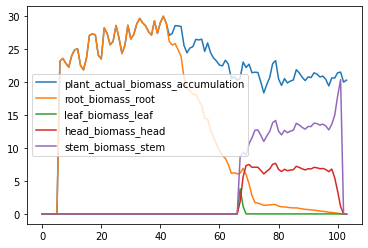

In [2]:
plot_variables([('plant', 'actual_biomass_accumulation'),
                ('root', 'biomass_root'),
                ('leaf', 'biomass_leaf'),
                ('head', 'biomass_head'),
                ('stem', 'biomass_stem')])

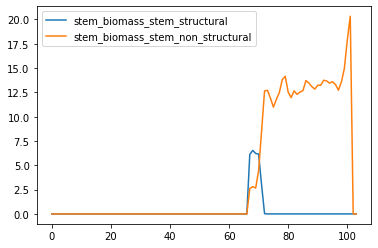

In [3]:
plot_variables([('stem', 'biomass_stem_structural'),
                ('stem', 'biomass_stem_non_structural')])

In [4]:
for key in wheat['plant'].keys():
    print(key)

crown_t_mean
tt_base
tt_adj_gen
tt_adj_env
phase_day
phase_tt
phase_remaining_tt
stage
biomass_total
radiation_use_efficiency
intercepted_radiation
temperature_factor
nitrogen_factor
co2_factor
potential_biomass_accumulation
transpiration_efficiency_factor
vapour_pressure_deficit
transpiration_efficiency_coefficient
transpiration_efficiency
water_demand
water_deficiency_factor
actual_biomass_accumulation
unfulfilled
photoperiod
vernalisation
vernalisation_factor


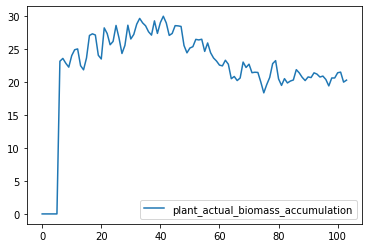

In [5]:
plot_variables([('plant', 'actual_biomass_accumulation')])

[('plant', 'biomass_total'), ('root', 'biomass_total'), ('leaf', 'biomass_total'), ('head', 'biomass_total'), ('stem', 'biomass_total')]


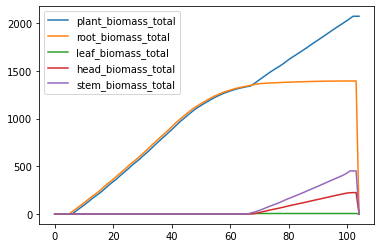

In [6]:
components = ['plant', 'root', 'leaf', 'head', 'stem']
args = [(c, 'biomass_total') for c in components]
print(args)
plot_variables(args)

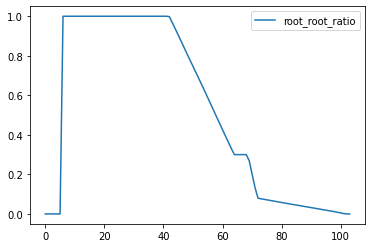

In [7]:
plot_variables([('root', 'root_ratio')])

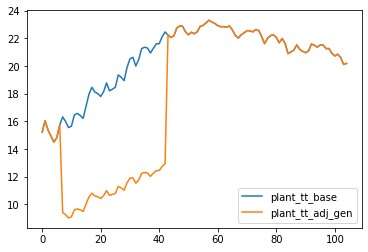

In [8]:
plot_variables([('plant', 'tt_base'), ('plant', 'tt_adj_gen')])

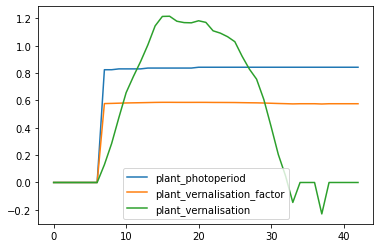

In [9]:
plot_variables([('plant', 'photoperiod'), ('plant', 'vernalisation_factor'), ('plant', 'vernalisation')])

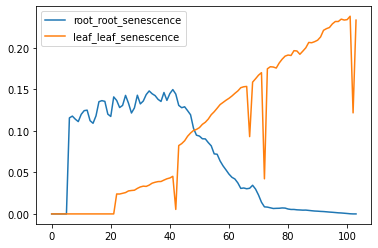

In [10]:
plot_variables([('root', 'root_senescence'), ('leaf', 'leaf_senescence')])

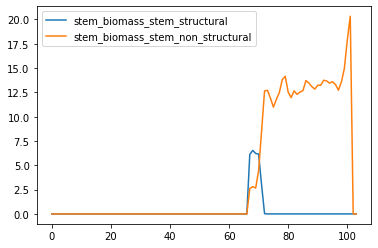

In [11]:
plot_variables([
                ('stem', 'biomass_stem_structural'),
                ('stem', 'biomass_stem_non_structural')])

In [12]:
from matplotlib import pyplot as plt
from sim_runner import sim_runner
import numpy as np

co2_comparison = {}
co2_levels = [300, 700, 1000]
for level in co2_levels:
    label = 'wheat_' + str(level)
    sim = sim_runner(1980, level)
    co2_comparison[label] = sim

def compare_field(sims, component, field):
    max_len = 0
    fields = {}
    for label, sim in sims.items():
        field_data = sim[component][field]
        max_len = max(max_len, len(field_data))
        fields[label] = field_data
    steps = [i for i in range(max_len)]
    for sim, field_data in fields.items():
        field_len = len(field_data)
        padding = max_len - field_len
        if padding > 0:
            field_data = list(np.pad(field_data, (0, padding), 'constant'))
        plt.plot(steps, field_data, label=sim)
    plt.legend()

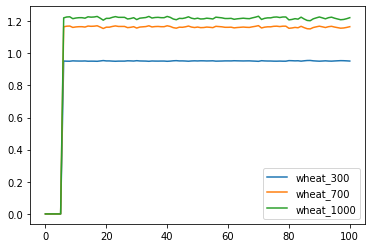

In [13]:
compare_field(co2_comparison, 'plant', 'co2_factor')

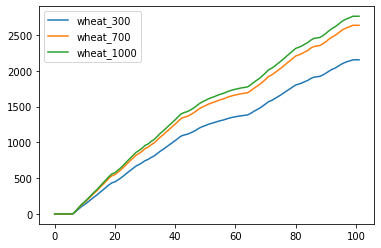

In [14]:
compare_field(co2_comparison, 'plant', 'biomass_total')

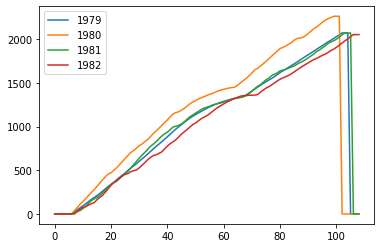

In [15]:
years = [1979, 1980, 1981, 1982, 1983]
year_comparison = {}
for year in range(1979, 1983, 1):
    year_comparison[year] = sim_runner(year)
compare_field(year_comparison, 'plant', 'biomass_total')

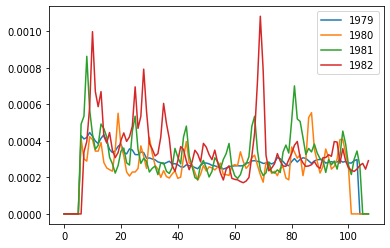

In [16]:
compare_field(year_comparison, 'plant', 'transpiration_efficiency')

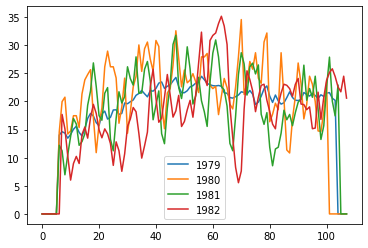

In [17]:
compare_field(year_comparison, 'plant', 'vapour_pressure_deficit')

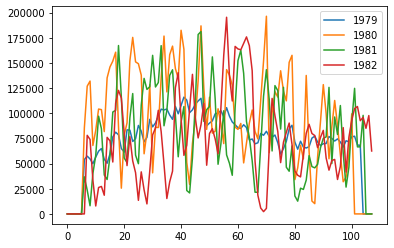

In [18]:
compare_field(year_comparison, 'plant', 'water_demand')

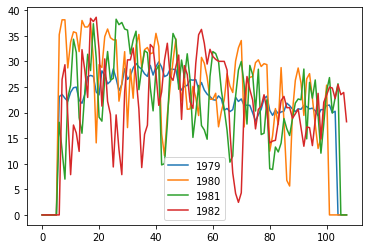

In [20]:
compare_field(year_comparison, 'plant', 'actual_biomass_accumulation')